### 数据处理

In [2]:
import pandas as pd  # 导入pandas
col_names =['Country','Continent','Life_expectancy','GDP_per_capita','Population']  #设置表头（列标签）
worldindex = pd.read_csv('WorldIndex.csv')  # 取WordIndex.csv 数据
print(worldindex.shape) 
worldindex.head()   # 查看前5行数据

(177, 5)


,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [3]:
worldindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [4]:
worldindex.isnull().sum()

Country            0
Continent          0
Life_expectancy    8
GDP_per_capita     8
Population         1
dtype: int64

In [5]:
#显示缺失行数据
Life_expectancy_null = worldindex[pd.isnull(worldindex['Life_expectancy'])]
Life_expectancy_null

,Country,Continent,Life_expectancy,GDP_per_capita,Population
87,Andorra,Europe,NaN,NaN,78014.0
116,Monaco,Europe,NaN,NaN,38307.0
123,San Marino,Europe,NaN,NaN,32960.0
138,Dominica,North America,NaN,7069.502788,73162.0
154,Marshall Islands,Oceania,NaN,3385.904065,52994.0
156,Nauru,Oceania,NaN,8052.888385,12475.0
158,Palau,Oceania,NaN,13500.563700,21288.0
163,Tuvalu,Oceania,NaN,2970.027974,11001.0


In [6]:
GDP_per_capita_null = worldindex[pd.isnull(worldindex['GDP_per_capita'])]
GDP_per_capita_null

,Country,Continent,Life_expectancy,GDP_per_capita,Population
13,Eritrea,Africa,64.100902,NaN,NaN
23,Libya,Africa,71.826317,NaN,6234955.0
87,Andorra,Europe,NaN,NaN,78014.0
110,Liechtenstein,Europe,82.073171,NaN,37403.0
116,Monaco,Europe,NaN,NaN,38307.0
123,San Marino,Europe,NaN,NaN,32960.0
159,Papua New Guinea,Oceania,62.776683,NaN,7919825.0
176,Venezuela,South America,74.409610,NaN,31155134.0


In [7]:
Population_null = worldindex[pd.isnull(worldindex['Population'])]
Population_null

,Country,Continent,Life_expectancy,GDP_per_capita,Population
13,Eritrea,Africa,64.100902,NaN,NaN


In [8]:
#丢弃某几列有缺失值的行
new_data = worldindex.dropna(axis=0, subset=['Life_expectancy','GDP_per_capita','Population'])
print(new_data.shape)

(164, 5)


In [9]:
worldindex.Continent.value_counts()   #查看Continent种类及对应的数据个数

Africa           50
Europe           45
Asia             36
North America    20
Oceania          14
South America    12
Name: Continent, dtype: int64

In [10]:
Africa=worldindex[worldindex.Continent=="Africa"]
Africa.describe()  #查看Africa的数据在统计方面的信息，其他洲的数据统计方法相同

,Life_expectancy,GDP_per_capita,Population
count,50.000000,48.000000,4.900000e+01
mean,61.606192,2355.184304,2.182988e+07
std,6.677911,3037.958053,3.191853e+07
min,48.873951,303.681022,9.341900e+04
25%,57.190512,594.529745,2.425561e+06
50%,61.730378,1046.260588,1.188214e+07
75%,64.812268,2919.695454,2.758282e+07
max,75.042537,15390.040640,1.811817e+08


### 画图练习

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
str(object) 
import warnings 
warnings.filterwarnings("ignore") 
new_data['Life_expectancy'] = pd.to_numeric(new_data['Life_expectancy'],errors='coerce')
new_data['GDP_per_capita'] = pd.to_numeric(new_data['GDP_per_capita'],errors='coerce')
new_data['Population'] = pd.to_numeric(new_data['Population'],errors='coerce')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
Country            164 non-null object
Continent          164 non-null object
Life_expectancy    164 non-null float64
GDP_per_capita     164 non-null float64
Population         164 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


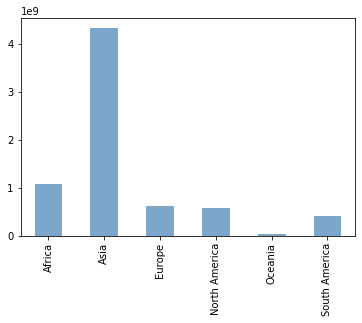

In [17]:
#将数据按大洲分组
Africa=worldindex[worldindex.Continent=="Africa"]
Asia=worldindex[worldindex.Continent=="Asia"]
Europe=worldindex[worldindex.Continent=='Europe']
NorthAmerica=worldindex[worldindex.Continent=='North America']
Oceania=worldindex[worldindex.Continent=='Oceania']
SouthAmerica=worldindex[worldindex.Continent=='South America']

#大洲人口数柱状图
p=pd.Series([Africa.Population.sum(), Asia.Population.sum(), Europe.Population.sum(), NorthAmerica.Population.sum(), Oceania.Population.sum(),SouthAmerica.Population.sum()], index=['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America'])
p.plot(kind='bar',color = 'steelblue', alpha = 0.7)

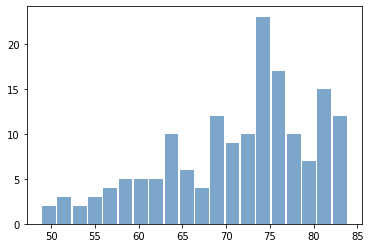

In [16]:
#人均寿命直方图
plt.hist(new_data.Life_expectancy, bins=20, color = 'steelblue', alpha = 0.7,rwidth=0.9,)  # bins 设置区间数，rwidth设置柱子相对宽度
plt.show()

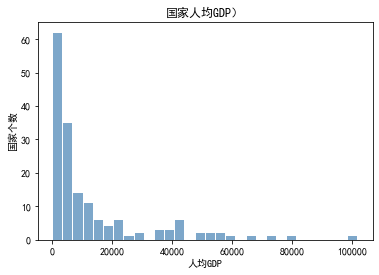

In [18]:
#人均GDP直方图
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
plt.hist(new_data.GDP_per_capita,bins=30,color = 'steelblue', alpha = 0.7,rwidth=0.9)

plt.xlabel('人均GDP')
plt.ylabel('国家个数')

plt.title('国家人均GDP）')
plt.show()

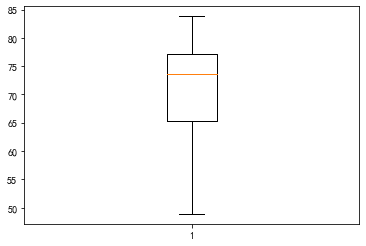

In [29]:
#绘制人均寿命箱图
plt.boxplot(new_data.Life_expectancy)
plt.show()

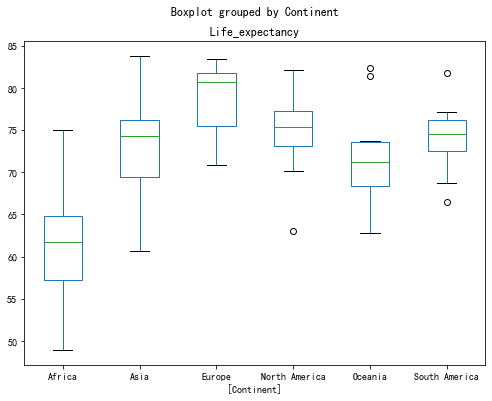

In [25]:
#五大洲人口寿命箱图
worldindex[['Life_expectancy', 'Continent']].boxplot(grid=False, by='Continent', figsize=(8, 6))

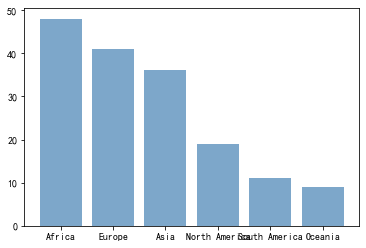

In [19]:
import numpy as np

conti_count = new_data.Continent.value_counts()  # 统计每个州的国家数
conti = list(conti_count.index)  # 获取各大州名称

x = np.arange(len(conti))

plt.bar(x, conti_count,)   # 条形图
plt.xticks(x, conti)  # 设置横坐标
plt.show()

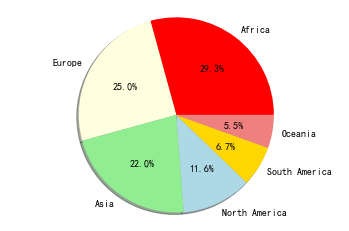

In [28]:
#绘制各大洲国家数量占比
labels = conti
colors = ['red', 'lightyellow', 'lightgreen','lightblue','gold','lightcoral']
plt.pie(conti_count, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%')  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.show()

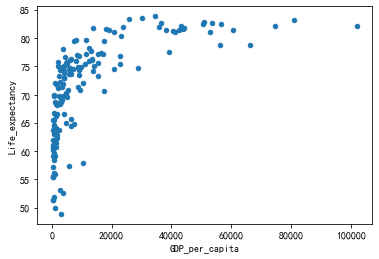

In [38]:
worldindex.plot(kind='scatter', x="GDP_per_capita", y="Life_expectancy")

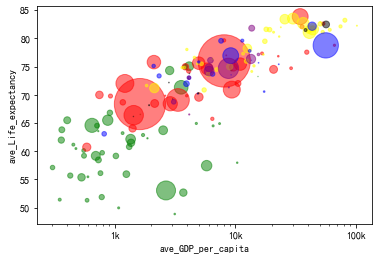

In [35]:
#气泡图
map_dict = {      
    'Asia':'red',
    'Europe':'yellow',
    'Africa':'green',
    'North America':'blue',
    'South America':'purple',
    'Oceania':'black'
}
colors = new_data.Continent.map(map_dict)   # 将国家按所在州对于不同的颜色

size = new_data.Population / 1e6 * 2
plt.scatter(x=new_data.GDP_per_capita, y=new_data.Life_expectancy, s=size, c=colors, alpha=0.5)  # 参数c设置颜色，alpha设置透明度
plt.xscale('log')

plt.xlabel('ave_GDP_per_capita')
plt.ylabel('ave_Life_expectancy')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)

plt.show()

### 解方程

1
$$
f(x)= 2 sin(x) - x + 1
$$

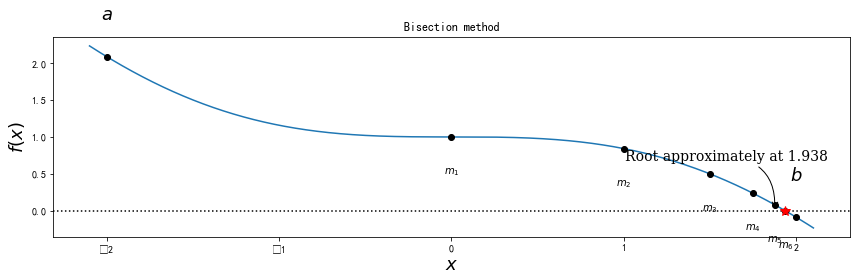

In [43]:
# define a function, desired tolerance and starting interval [a, b]
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: np.sin(x) - x + 1
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

fig.tight_layout()

In [48]:
from scipy import optimize
optimize.bisect(lambda x: np.sin(x) - x + 1, -2, 2)

1.934563210752458

In [49]:
optimize.newton(lambda x: np.sin(x) - x + 1, 2)

1.9345632107521789

In [51]:
optimize.brentq(lambda x: np.sin(x) - x + 1, -2, 2)

1.934563210751988

In [52]:
optimize.brenth(lambda x: np.sin(x) - x + 1, -2, 2)

1.9345632107520028

In [54]:
optimize.ridder(lambda x: np.sin(x) - x + 1, -2, 2)

1.9345632107510244

2
$$
3 x_1 + 2 x_2 = 3
$$

$$
 x_1 - 2 x_2 = 5
$$

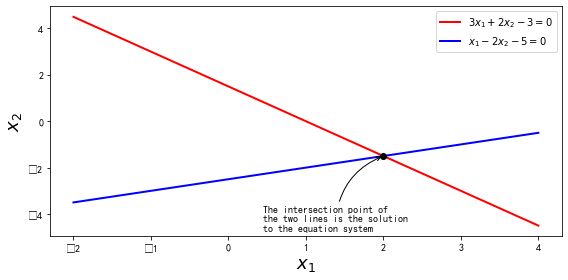

In [80]:
from scipy import linalg as la
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-2, 4, 100)

x2_1 = (3 - 3 * x1)/2
x2_2 = (1 * x1 - 5)/2

ax.plot(x1, x2_1, 'r', lw=2, label=r"$3x_1+2x_2-3=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$x_1-2x_2-5=0$")

A = np.array([[3, 2], [1, -2]])
b = np.array([3, 5])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()

In [81]:
A = np.array([[3, -2], [1, 2]])
b = np.array([3, 5])

np.linalg.matrix_rank(A)

2

In [82]:
np.linalg.cond(A)

1.640388203202208

In [83]:
np.linalg.norm(A)

4.242640687119285

In [84]:
P, L, U = la.lu(A)
la.solve(A, b)

array([2. , 1.5])